In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import ndimage

In [4]:
def detect_blobs(img_path, grayscale=True):
    img = ndimage.imread(img_path)
    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    bd_params = cv2.SimpleBlobDetector_Params()
    bd_params.minArea = 5
    bd_params.minThreshold = 200
    bd_params.maxThreshold = 256
    detector = cv2.SimpleBlobDetector_create(bd_params)
    keypoints = detector.detect(img)
    
    return keypoints

Keypoint detected at (468.219055, 1050.678833)


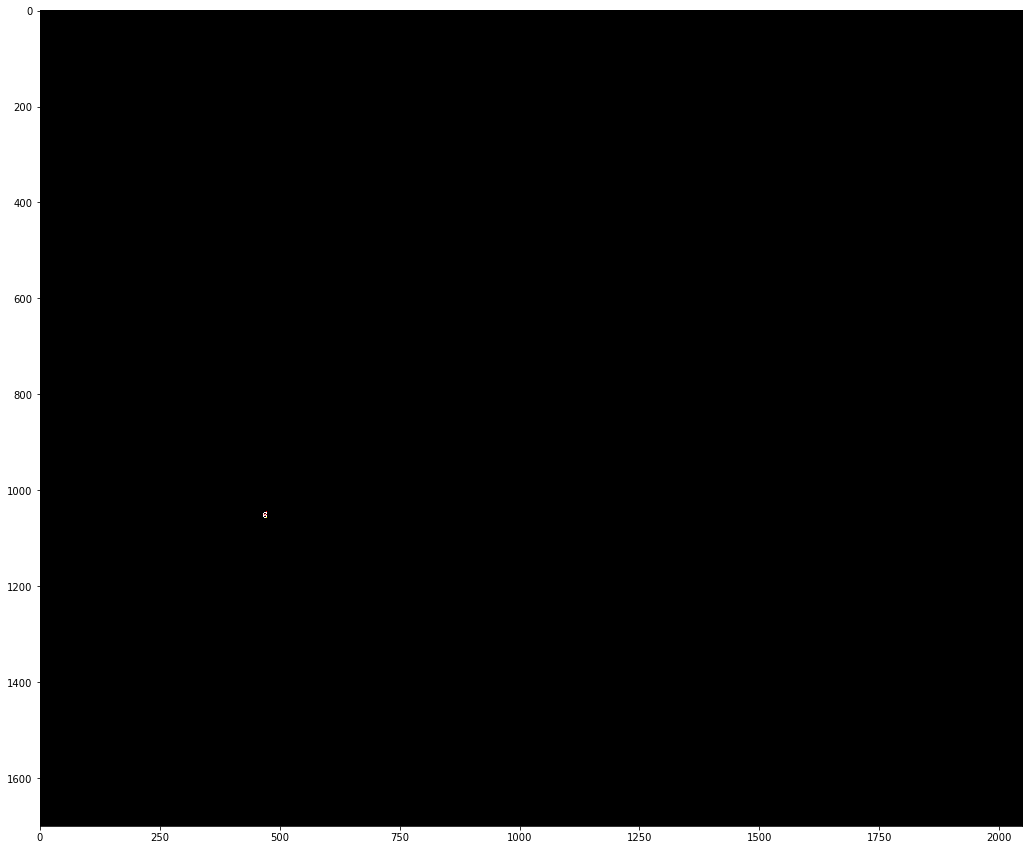

In [13]:
tresh1_path = "tresh1.png"
keypoints = detect_blobs(tresh1_path)

for kp in keypoints:
    print("Keypoint detected at (%f, %f)" % (kp.pt[0], kp.pt[1]))

im_with_keypoints = cv2.drawKeypoints(ndimage.imread(tresh1_path), keypoints, None, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=[30, 15])
plt.imshow(im_with_keypoints)
cv2.imwrite("im_with_keypoints.png", im_with_keypoints)
plt.show()

# Tests

In [ ]:
tresh1 = ndimage.imread(tresh1_path)
plt.figure(figsize=[30, 15])
plt.imshow(tresh1)
plt.show()

In [ ]:
blurred_tresh1 = cv2.GaussianBlur(tresh1, (9, 9), 3)
plt.figure(figsize=[30, 15])
plt.imshow(blurred_tresh1)
plt.show()

In [ ]:
tresh1_gray = cv2.cvtColor(blurred_tresh1, cv2.COLOR_BGR2GRAY)

bd_params = cv2.SimpleBlobDetector_Params()
bd_params.minThreshold = 150
bd_params.maxThreshold = 256
bd_params.thresholdStep = 20
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(tresh1_gray)
print(keypoints)
im_with_keypoints = cv2.drawKeypoints(tresh1, keypoints, None, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[30, 15])
plt.imshow(im_with_keypoints)
cv2.imwrite("im_with_keypoints.png", im_with_keypoints)
plt.show()